# Ashwin Rajan 2448509
# Dynamic Time Warping (DTW) – Lab Exercise

**Aim:**  
To compare and align two numerical sequences using Dynamic Time Warping (DTW) and evaluate their similarity based on the DTW distance.

**Given Data:**  
- Vector 1: `[2, 3, 4, 6, 8, 7, 6, 5, 4, 3, 2]`  
- Vector 2: `[2, 4, 6, 7, 7, 6, 5, 5, 4, 3, 2, 2, 1]`


In [ ]:
# --- Step 1: Import the required libraries and define the vectors ---

import numpy as np
import matplotlib.pyplot as plt

# For nice, sharp plots inside Jupyter
%matplotlib inline

# Given vectors (numerical sequences)
vector1 = np.array([2, 3, 4, 6, 8, 7, 6, 5, 4, 3, 2])
vector2 = np.array([2, 4, 6, 7, 7, 6, 5, 5, 4, 3, 2, 2, 1])

print("Vector 1:", vector1)
print("Vector 2:", vector2)
print("Length of Vector 1:", len(vector1))
print("Length of Vector 2:", len(vector2))

Vector 1: [2 3 4 6 8 7 6 5 4 3 2]
Vector 2: [2 4 6 7 7 6 5 5 4 3 2 2 1]
Length of Vector 1: 11
Length of Vector 2: 13


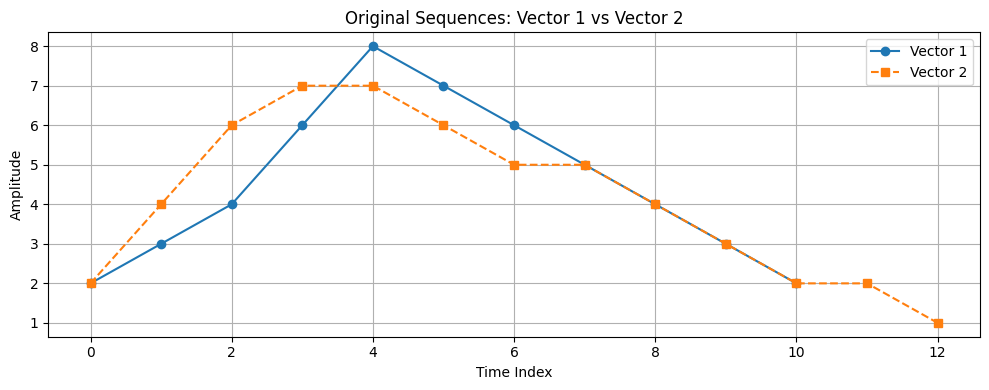

In [ ]:
# --- Step 2: Plot both vectors to visualize their patterns ---

plt.figure(figsize=(10, 4))

# Plot Vector 1
plt.plot(vector1, marker='o', linestyle='-', label='Vector 1')

# Plot Vector 2
plt.plot(vector2, marker='s', linestyle='--', label='Vector 2')

plt.title('Original Sequences: Vector 1 vs Vector 2')
plt.xlabel('Time Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Observation (visually):
# - Vector 2 is longer (more samples).
# - Patterns are similar but "stretched" and slightly shifted in time.


In [ ]:
# --- Step 3: Implement the DTW algorithm ---
# We implement DTW from scratch to clearly see the cost matrix and warping path.

def dtw(x, y, dist=lambda a, b: abs(a - b)):
    """
    Compute Dynamic Time Warping (DTW) distance between two 1-D sequences.

    Parameters
    ----------
    x, y : 1-D numpy arrays
        Input sequences to be aligned.
    dist : callable
        Local distance function. By default, |a - b| (absolute difference).

    Returns
    -------
    D : 2-D numpy array
        Accumulated cost matrix.
    path : list of tuple
        Optimal warping path as list of (i, j) indices.
    dtw_distance : float
        Final DTW distance between the two sequences.
    """
    n = len(x)
    m = len(y)

    # Initialize accumulated cost matrix with infinity
    D = np.full((n + 1, m + 1), np.inf)
    D[0, 0] = 0.0  # starting point

    # Fill the accumulated cost matrix
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = dist(x[i - 1], y[j - 1])  # local distance between points
            # Take min of (left, up, diagonal) neighbors
            D[i, j] = cost + min(D[i - 1, j],    # insertion
                                 D[i, j - 1],    # deletion
                                 D[i - 1, j - 1])  # match

    # Backtracking to find optimal warping path
    i, j = n, m
    path = []
    while i > 0 and j > 0:
        path.append((i - 1, j - 1))  # store indices in terms of original sequences
        # Move to the neighbor with the smallest accumulated cost
        steps = [
            (D[i - 1, j - 1], i - 1, j - 1),  # diagonal
            (D[i - 1, j],     i - 1, j),      # up
            (D[i, j - 1],     i,     j - 1)   # left
        ]
        cost_prev, i, j = min(steps, key=lambda t: t[0])

    # If we reach first row or first column, continue back to the origin
    while i > 0:
        path.append((i - 1, j - 1))
        i -= 1
    while j > 0:
        path.append((i - 1, j - 1))
        j -= 1

    path.reverse()  # reverse the path to start from (0,0)

    dtw_distance = D[n, m]
    return D[1:, 1:], path, dtw_distance  # strip the extra row/col used for initialization


# Compute DTW for the given vectors
cost_matrix, warping_path, dtw_distance = dtw(vector1, vector2)

print("DTW distance between Vector 1 and Vector 2:", dtw_distance)
print("Cost matrix shape:", cost_matrix.shape)
print("Number of points in optimal warping path:", len(warping_path))

DTW distance between Vector 1 and Vector 2: 3.0
Cost matrix shape: (11, 13)
Number of points in optimal warping path: 14


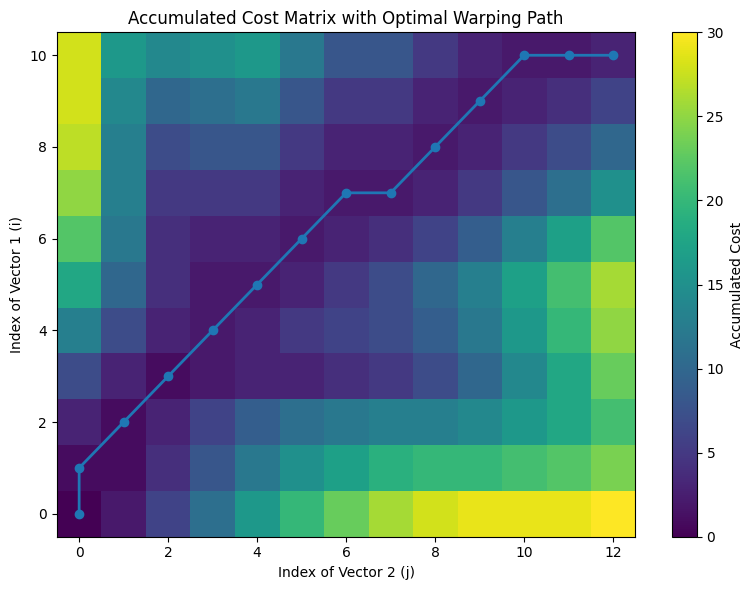

In [ ]:
# --- Step 4: Visualize the accumulated cost matrix and optimal warping path ---

plt.figure(figsize=(8, 6))

# Show the accumulated cost matrix
plt.imshow(cost_matrix, origin='lower', aspect='auto')
plt.title('Accumulated Cost Matrix with Optimal Warping Path')
plt.xlabel('Index of Vector 2 (j)')
plt.ylabel('Index of Vector 1 (i)')
plt.colorbar(label='Accumulated Cost')

# Extract path indices
path_i = [p[0] for p in warping_path]
path_j = [p[1] for p in warping_path]

# Overlay the warping path
plt.plot(path_j, path_i, marker='o', linestyle='-', linewidth=2)

plt.tight_layout()
plt.show()

# Interpretation:
# - Darker regions usually indicate lower cost alignment.
# - The white / overlaid path shows the optimal alignment path
#   from (0,0) to (len(Vector1)-1, len(Vector2)-1).

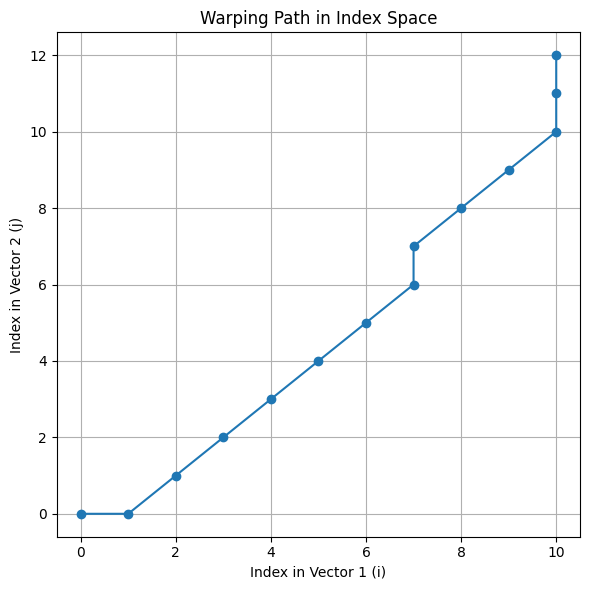

In [ ]:
# --- Step 5: Plot the warping path in index space (time index vs time index) ---

plt.figure(figsize=(6, 6))

plt.plot(path_i, path_j, marker='o', linestyle='-')
plt.title('Warping Path in Index Space')
plt.xlabel('Index in Vector 1 (i)')
plt.ylabel('Index in Vector 2 (j)')
plt.grid(True)
plt.tight_layout()
plt.show()

# If the two sequences were perfectly aligned in time,
# the path would lie close to the diagonal i = j.
# Deviation from the diagonal indicates stretching/compressing in time.

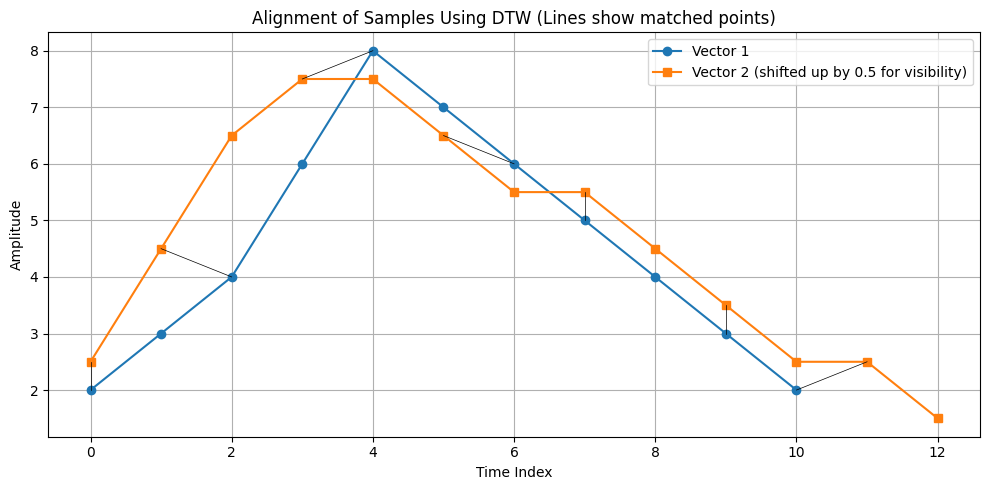

In [ ]:
# --- Step Visualize how samples are matched between vectors

plt.figure(figsize=(10, 5))

# Plot the original sequences (staggered vertically for clarity)
plt.plot(vector1, marker='o', label='Vector 1')
plt.plot(vector2 + 0.5, marker='s', label='Vector 2 (shifted up by 0.5 for visibility)')

# Draw lines showing how points are matched along the warping path
for (i, j) in warping_path[::2]:  # use every 2nd point to avoid clutter
    plt.plot([i, j], [vector1[i], vector2[j] + 0.5], 'k-', linewidth=0.5)

plt.title('Alignment of Samples Using DTW (Lines show matched points)')
plt.xlabel('Time Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# This plot helps us see which sample in Vector 1 aligns with which sample in Vector 2.


In [ ]:
# --- Step 7: Inference / Explanation ---

print("DTW distance between the two vectors:", dtw_distance)

print("\nInference:")
print("1. The two vectors have similar overall shape (rise and fall of values),")
print("   but Vector 2 is longer (has more time samples) and slightly stretched in time.")
print("2. The DTW algorithm finds a non-linear warping path that allows one-to-many and")
print("   many-to-one alignments between time indices. This lets us 'compress' or 'stretch'")
print("   parts of Vector 2 to best match Vector 1.")
print("3. The warping path deviates from the main diagonal, which indicates where time")
print("   expansion or compression happens. When the path stays close to the diagonal,")
print("   the two sequences are locally well aligned in time.")
print("4. The resulting DTW distance is a single scalar that quantifies the similarity:")
print("   - A smaller DTW distance means the sequences are more similar in shape.")
print("   - A larger DTW distance would indicate more mismatch in amplitude or pattern.")
print("5. In this example, the DTW distance is relatively moderate/low (you can compare")
print("   it with other pairs of sequences), which confirms that the two vectors share")
print("   a similar pattern even though they differ in length and timing.")


DTW distance between the two vectors: 3.0

Inference:
1. The two vectors have similar overall shape (rise and fall of values),
   but Vector 2 is longer (has more time samples) and slightly stretched in time.
2. The DTW algorithm finds a non-linear warping path that allows one-to-many and
   many-to-one alignments between time indices. This lets us 'compress' or 'stretch'
   parts of Vector 2 to best match Vector 1.
3. The warping path deviates from the main diagonal, which indicates where time
   expansion or compression happens. When the path stays close to the diagonal,
   the two sequences are locally well aligned in time.
4. The resulting DTW distance is a single scalar that quantifies the similarity:
   - A smaller DTW distance means the sequences are more similar in shape.
   - A larger DTW distance would indicate more mismatch in amplitude or pattern.
5. In this example, the DTW distance is relatively moderate/low (you can compare
   it with other pairs of sequences), which con